In [1]:
import pandas as pd

In [2]:
import re

In [3]:
# Load file
with open('chat.txt', 'r', encoding='utf-8') as file:
    chat_data = file.readlines()

# Preview
print(chat_data[:10])

['2/2/23, 7:01\u202fPM - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.\n', '6/24/22, 11:55\u202fAM - Bayjit Vai CSE created group "CSE Notice Board, BSFMSTU"\n', '2/2/23, 7:01\u202fPM - Riad CSE Varsity added you\n', '2/2/23, 11:23\u202fPM - Maruf Vai CSE: <Media omitted>\n', '2/2/23, 11:23\u202fPM - Maruf Vai CSE: Congratulations! \n', '@\u2068~Shabbir Mahmood\u2069 sir\n', '2/2/23, 11:24\u202fPM - +880 1733-121094: Congratulations @\u2068~Shabbir Mahmood\u2069 sir❤️\n', '2/2/23, 11:24\u202fPM - Monir CSE: Congratulations sir\n', '2/2/23, 11:25\u202fPM - +880 1867-398974: Congratulations sir❤️❤️❤️\n', '2/3/23, 12:34\u202fAM - Maruf Vai CSE: <Media omitted>\n']


In [7]:
pattern = r'(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2}\s[AP]M) - (.*?): (.*)'

data = []
for line in chat_data:
    match = re.match(pattern, line)
    if match:
        date, time, sender, message = match.groups()
        data.append([date, time, sender, message])

df = pd.DataFrame(data, columns=['Date','Time','Sender','Message'])
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y', dayfirst=False)
print(df.head())

        Date      Time            Sender  \
0 2023-02-02  11:23 PM     Maruf Vai CSE   
1 2023-02-02  11:23 PM     Maruf Vai CSE   
2 2023-02-02  11:24 PM  +880 1733-121094   
3 2023-02-02  11:24 PM         Monir CSE   
4 2023-02-02  11:25 PM  +880 1867-398974   

                                     Message  
0                            <Media omitted>  
1                          Congratulations!   
2  Congratulations @⁨~Shabbir Mahmood⁩ sir❤️  
3                        Congratulations sir  
4                  Congratulations sir❤️❤️❤️  


/tmp/ipython-input-646036310.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [8]:
user_counts = df['Sender'].value_counts()
print(user_counts)

Sender
MD HUMAUN KABIR Sir Varsity    533
Imran Vai Cse Lab              394
Mamun Vai Lab Assistant        348
Jakirul Vai CSE                345
Hasan Sir CSE                  258
                              ... 
+880 1742-099557                 1
+880 1746-350793                 1
+880 1786-124840                 1
+880 1842-812668                 1
Hridoy Ratna CSE                 1
Name: count, Length: 147, dtype: int64


<Axes: title={'center': 'Messages per Day'}, xlabel='Date'>

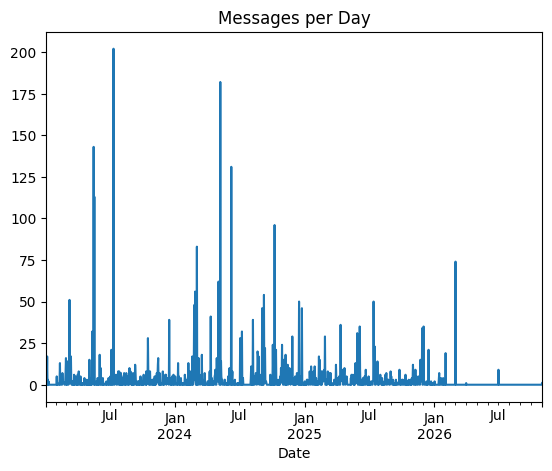

In [9]:
df.set_index('Date', inplace=True)
messages_per_day = df.resample('D').count()['Message']
messages_per_day.plot(title='Messages per Day')

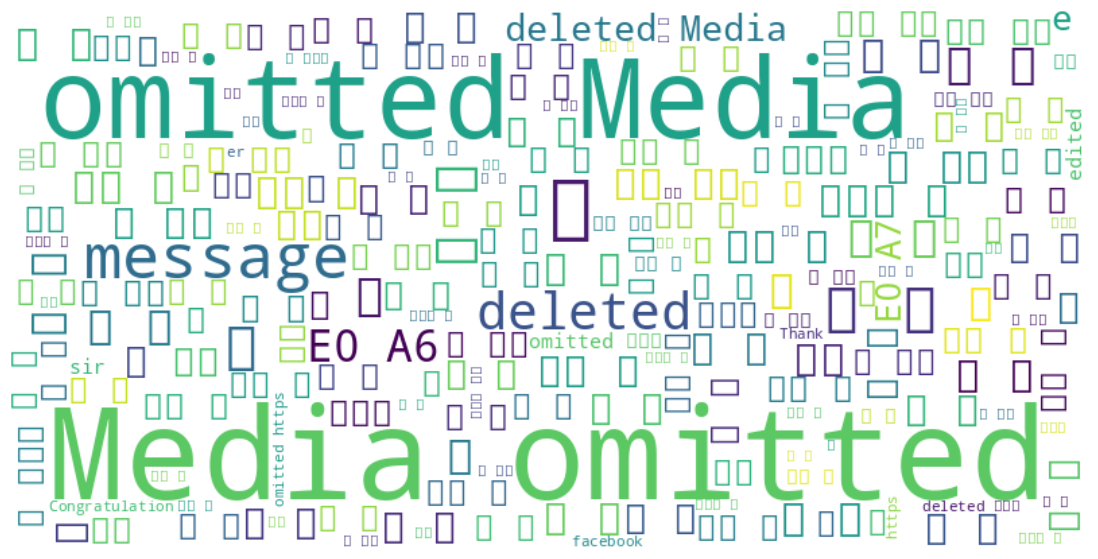

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['Message'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
!pip install emoji
import emoji
from collections import Counter

all_emojis = []
for message in df['Message']:
    all_emojis += [c for c in message if c in emoji.EMOJI_DATA]

emoji_counts = Counter(all_emojis)
print(emoji_counts.most_common(10))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 34.9 MB/s eta 0:00:00
[('❤', 42), ('🎉', 12), ('🥰', 10), ('😁', 9), ('🖤', 9), ('🙂', 9), ('😊', 8), ('🌙', 7), ('💝', 6), ('😪', 6)]


<Axes: xlabel='Hour', ylabel='Day'>

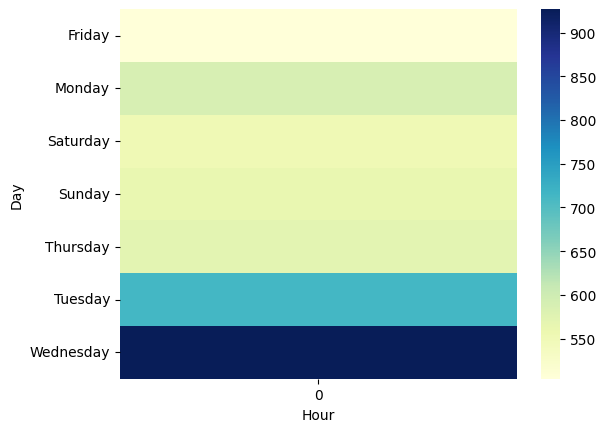

In [14]:
df['Hour'] = df.index.hour
df['Day'] = df.index.day_name()
import seaborn as sns

heatmap_data = df.groupby(['Day','Hour']).count()['Message'].unstack()
sns.heatmap(heatmap_data, cmap='YlGnBu')